# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-retardadores" data-toc-modified-id="Determinación-de-los-parámetros-de-los-retardadores-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los retardadores</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4" data-toc-modified-id="Rotación-de-P4-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rotación de P4</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Final</a></div>

# Comparación entre modelo experimetnal y teórico

**Autor**: Luis Miguel Sanchez Brea

**Fecha**:   11/05/2018

**Objetivo**: Ecograb project, polariscope callibration

**Configuración**:

1. Diodo láser de Roithner .... de longitud de onda $\lambda$=850 nm (corriente = 314 mA).
1. Lente colimadora de Thorlabs DG10-600-B.
1. Difusor.
1. Lámina retardadora $\lambda/4$ ... de Throlabs para hacer el haz de luz circular.
1. Polarizador 1 Thorlabs LPNIRE100-B.
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Retardador  3 $\lambda/4$ Thorlabs WPQ10E-850-SP
1. Polarizador 4 Thorlabs LPNIRE100-B.



**Procedimiento**:

1. Se conocen todos los parámetros

1. Se hacen movimientos. Se meten estos movimientos en la teoría y se compara


**¡FUNCIONA!**




In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import print_function, division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint

from scipy.io import savemat, loadmat

## Teoria

In [3]:
# import modules
from phyton_optics import sp, plt, mm, um, nm, degrees, np
import phyton_optics.polarization_stokes as polarization
from phyton_optics.polarization_stokes import (
    intensity, polarized_light, polarizer_linear, quarter_waveplate, rotate_mueller, 
    diattenuating_retarder, retarder, vacuum)

from polarimeter.polarimeter import (get_polarimeter_parameters, polarimeter_matrices,
    rotate_polarimeter, polarimeter_matrix, get_light_parameters)
from polarimeter.utils import dibujar_2d_fitting
from scipy import sin, cos,pi
from scipy.io import savemat, loadmat
from scipy import optimize

import pprint 
np.set_printoptions(precision=4)
sp.set_printoptions(precision=4)

## Tarjeta de adquisición de datos

In [4]:
from polarimeter.daca import u3, LabJackPython, get_intensity, V, mV

In [5]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_number=1

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
# ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
# ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
# print(ainValue)

## Motores

In [6]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels=[50,50,50,50]


In [7]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



In [8]:
# Intensidad con motores a 0
motors.get_position()

ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
print(ainValue)

motor     = (  0.00,   0.00,   0.00,   0.00)
absolute  = (  0.00,  -0.00,  -0.00,   0.00)
polarizer = ( -2.79, -44.58, -131.76, -161.88)
1.21904802439


## Muevo y comparo

In [9]:
# Move motor 1 to maximum position of laser diode
Vels=[150,150,150,150]


# motors.move(
#        positions=[2.788, 44.5766+2, 131.763+3, 161.88+90], velocities=Vels, kind='polarizer', verbose=False)
motors.move(
        positions=[2.79, 44.57, 131.76, 161.89+90], velocities=Vels, kind='absolute', verbose=False)
_,_,pos_pol=motors.get_position()
Intensity_experimental=get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=True);

motor     = (  2.79, -44.57, -131.76, 251.89)
absolute  = (  2.79,  44.57, 131.76, 251.89)
polarizer = (  0.01,  -0.01,  -0.00,  90.01)
0.1087, 

In [10]:
param_u0, u0 =get_light_parameters()

p0_best = 0.128068490426
p1_best = 0.934950416021
phase_best = 78.38*degrees
  
P1=polarizer_linear(p1=p1_best, p2=p0_best, theta=pos_pol[0])
P2=diattenuating_retarder(p1=1, p2=1, phase=phase_best, theta=pos_pol[1])
P3=diattenuating_retarder(p1=1, p2=1, phase=phase_best, theta=pos_pol[2])
P4=polarizer_linear(p1=p1_best, p2=p0_best, theta=pos_pol[3])

S=P4*P3*P2*P1
Intensity_modelo=float((S*u0)[0])
print(Intensity_experimental, Intensity_modelo, Intensity_experimental-Intensity_modelo)
   

0.108692352893 0.655236965506 -0.546544612613


In [11]:
factor=Intensity_experimental/Intensity_modelo
print(factor)
factor*Intensity_modelo

0.165882510626


0.10869235289283097

## Hago funcion de comparación

In [12]:
def mover_comparar(positions, kind, factor, verbose=False):
    Vels=[150,150,150,150]
    motors.move(
        positions=positions, velocities=Vels, kind=kind, verbose=False)
    _,_,pos_pol=motors.get_position(verbose=False)
    pos_pol=pos_pol*degrees
    Intensity_experimental=get_intensity(d=d, u=u3, AIN_number=AIN_number, verbose=verbose)
    param_u0, u0 =get_light_parameters()

    p0_best = 0.128068490426
    p1_best = 0.934950416021
    phase_best = 78.38*degrees
    phase_best = 90*degrees

    P1=polarizer_linear(p1=p1_best, p2=p0_best, theta=pos_pol[0])
    P2=diattenuating_retarder(p1=1, p2=1, phase=phase_best, theta=pos_pol[1])
    P3=diattenuating_retarder(p1=1, p2=1, phase=phase_best, theta=pos_pol[2])
    P4=polarizer_linear(p1=p1_best, p2=p0_best, theta=pos_pol[3])

    S=P4*P3*P2*P1
    Intensity_modelo=float((S*u0)[0])
    
    if verbose:
        print("")
        print(Intensity_experimental, Intensity_modelo*factor, Intensity_experimental-Intensity_modelo*factor)
        print(factor)
    return Intensity_experimental, Intensity_modelo, Intensity_experimental/Intensity_modelo
   

In [13]:
pos_pol*degrees

array([ 0.0001, -0.0001, -0.0001,  1.571 ])

In [14]:
Intensity_experimental, Intensity_modelo, factor=mover_comparar([0,0,0,0], 'absolute', 1);
print(Intensity_experimental, Intensity_modelo, factor)

1.21904802439 1.20927313484 1.00808327686


# modo ordenado

In [31]:
pos2=sp.linspace(0,90,11)
pos3=sp.linspace(0,90,9)
Pos2,Pos3=sp.meshgrid(pos2,pos3)

num_medidas=len(pos2)*len(pos3)

posiciones = sp.zeros(num_medidas,4)

I_exp=sp.zeros_like(Pos2,dtype=float)
I_teo=sp.zeros_like(Pos2,dtype=float)

k=0
for i,p2 in enumerate(pos2):
    for j,p3 in enumerate(pos3):
        posiciones[k,:]=[2.788,p2,p3,161.88-90]
        Intensity_experimental, Intensity_modelo, factor = mover_comparar([2.788,p2,p3,161.88-90],'absolute', 1);
        I_exp[j,i]= Intensity_experimental
        I_teo[j,i]= Intensity_modelo


error = 26.2697416767 %


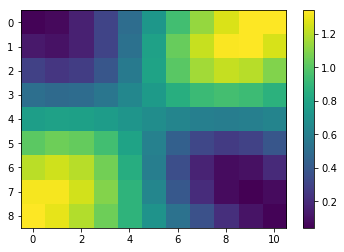

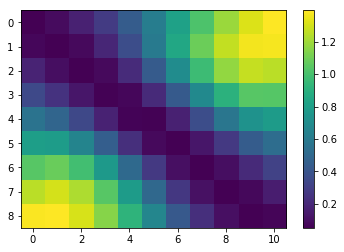

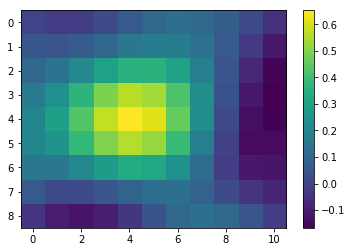

In [35]:
plt.figure()
plt.imshow(I_teo)
plt.colorbar()
plt.figure()
plt.imshow(I_exp)
plt.colorbar()
plt.figure()
plt.imshow(I_teo-I_exp)
plt.colorbar()


area_error=abs(I_teo-I_exp).sum()
area_total=abs(I_teo).sum()

error=area_error/area_total*100
print("error = {} %".format(error))

In [37]:
filename="step8_exp ordenado {}".format(datetime.date.today())

data=dict(pos2=pos2, pos3=pos3, I_exp=I_exp, I_teo=I_teo)
savemat(filename+'.mat', data, oned_as='row')

# modo aleatorio

In [15]:
num_medidas = 150
posiciones = 360*sp.rand(num_medidas,4)

In [16]:
I_exp=sp.zeros(num_medidas, dtype=float)
I_teo=sp.zeros(num_medidas, dtype=float)
factores=sp.zeros(num_medidas, dtype=float)

for i,pos in enumerate(posiciones):
    positions=posiciones[i,:]
    Intensity_experimental, Intensity_modelo, factor = mover_comparar(positions,'absolute', 1);
    I_exp[i]= Intensity_experimental
    I_teo[i]= Intensity_modelo
    factores[i] = factor

error = 27.088129206 %


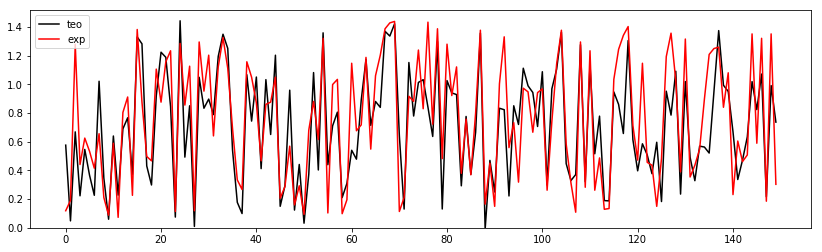

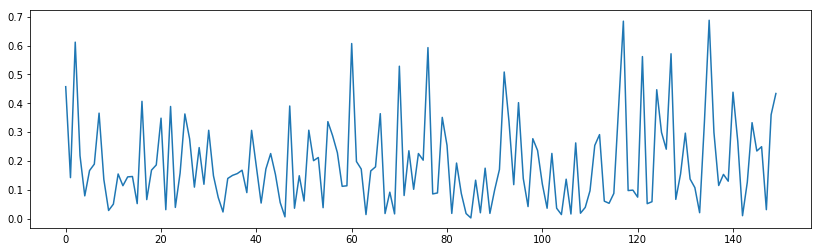

In [17]:
plt.figure(figsize=(14,4))
plt.plot(I_teo, 'k', label='teo')
plt.plot(I_exp, 'r', label='exp')
plt.legend()
plt.ylim(ymin=0)
plt.figure(figsize=(14,4))
plt.plot(abs(I_teo-I_exp))


area_error=abs(I_teo-I_exp).sum()
area_total=abs(I_teo).sum()

error=area_error/area_total*100
print("error = {} %".format(error))

In [18]:
filename="step8_exp aleat b {}".format(datetime.date.today())

data=dict(posiciones=posiciones, I_exp=I_exp, I_teo=I_teo)
savemat(filename+'.mat', data, oned_as='row')

## Final

In [19]:
motors.close()
del motors
LabJackPython.Close()